# Import Basic Libraries

In [98]:
import pandas as pd
import numpy as np

In [99]:
import os
os.listdir('../input/mice-protein-expression/')

['Data_Cortex_Nuclear.csv']

# Import Data

In [100]:
file = '../input/mice-protein-expression/Data_Cortex_Nuclear.csv'
data = pd.read_csv(file)
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [101]:
file = '../input/mice-protein-expression/Data_Cortex_Nuclear.csv'
data_eda = pd.read_csv(file)
data_eda.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Defining a function to show all columns and rows

In [102]:
def all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

<b>Preparing data - 
    1. Removing 3 rows for small missing values
    2. Filling the large missing values with mean of that column.<b>

In [103]:
all(data.isnull().sum())

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N   

In [104]:
data.shape

(1080, 82)

In [105]:
dataa = data.dropna(how = 'any', thresh = 75)
all(dataa.isnull().sum())

MouseID              0
DYRK1A_N             0
ITSN1_N              0
BDNF_N               0
NR1_N                0
NR2A_N               0
pAKT_N               0
pBRAF_N              0
pCAMKII_N            0
pCREB_N              0
pELK_N               0
pERK_N               0
pJNK_N               0
PKCA_N               0
pMEK_N               0
pNR1_N               0
pNR2A_N              0
pNR2B_N              0
pPKCAB_N             0
pRSK_N               0
AKT_N                0
BRAF_N               0
CAMKII_N             0
CREB_N               0
ELK_N               15
ERK_N                0
GSK3B_N              0
JNK_N                0
MEK_N                4
TRKA_N               0
RSK_N                0
APP_N                0
Bcatenin_N          15
SOD1_N               0
MTOR_N               0
P38_N                0
pMTOR_N              0
DSCR1_N              0
AMPKA_N              0
NR2B_N               0
pNUMB_N              0
RAPTOR_N             0
TIAM1_N              0
pP70S6_N   

In [106]:
dataa.drop('MouseID', axis = 1, inplace =True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
dataa.shape

(1077, 81)

In [108]:
dataa = dataa.fillna(dataa.mean())

In [109]:
all(dataa.isnull().sum())

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N       

<b>Since there are no missing values now, this data is ready for exploration<b>

# EDA & Visualize

In [110]:
import seaborn as sns

In [111]:
all(dataa.describe())

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.233168     0.181846     3.537109     0.212574     1.428682   
std       0.041634     0.027042     1.295169     0.032587     0.466904   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
25%       0.205755     0.164595     2.479834     0.190823     1.203665   
50%       0.231177     0.182302     3.326520     0.210594     1.355846   
75%       0.257261     0.197418     4.481940     0.234595     1.561316   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.545904     0.313505     0.317939     0.275033     0.825813   
std       0.345309     0.051978     0.052236     0.046164     0.117969   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
25%       0.337405     0.281242     0.281829     0.244287     0.743491   
50%       0.443644     0.321330     0.312977     0.277393     0.821076   
75%       0.663297     0.348714     0.352304     0.303450     0.898460   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N        AKT_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.726933     1.561965     1.525338     0.442848     0.682236   
std       0.188013     0.270737     0.481780     0.066672     0.127434   
min       0.281285     0.301609     0.567840     0.095942     0.064421   
25%       0.590303     1.381288     1.168258     0.404144     0.596816   
50%       0.719591     1.563696     1.365744     0.440598     0.682469   
75%       0.848640     1.748538     1.885899     0.482096     0.759695   
max       1.412750     2.723965     3.061387     0.650962     1.182175   

            BRAF_N     CAMKII_N       CREB_N        ELK_N        ERK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.378519     0.363357     0.180492     1.173400     2.474492   
std       0.216388     0.052352     0.026370     0.333437     0.653397   
min       0.143894     0.212960     0.113636     0.497695     1.131796   
25%       0.264334     0.330859     0.161830     0.947184     1.991756   
50%       0.326658     0.360260     0.179580     1.101887     2.401462   
75%       0.413561     0.393851     0.195718     1.318667     2.872606   
max       2.133416     0.586245     0.319558     2.802948     5.198404   

           GSK3B_N        JNK_N        MEK_N       TRKA_N        RSK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      1.172603     0.241644     0.272789     0.693180     0.168417   
std       0.244752     0.033901     0.040999     0.120825     0.028138   
min       0.151124     0.046298     0.147201     0.198743     0.107394   
25%       1.023134     0.220400     0.247170     0.617074     0.149622   
50%       1.159822     0.244947     0.273136     0.704964     0.166692   
75%       1.309673     0.263291     0.300623     0.774158     0.184533   
max       2.475751     0.387191     0.415408     1.001623     0.305136   

        

In [112]:
dataa.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [113]:
sk_df = pd.DataFrame(dataa.skew())
sk_df.reset_index(inplace = True)
sk_df.columns = ['Features','Skew']
sk_df = sk_df.sort_values(by = 'Skew', ascending = False)
sk_df.head()

Features      Skew
59   GluR4_N  4.732372
20    BRAF_N  4.547676
0   DYRK1A_N  4.356955
51    RRP1_N  4.007593
9     pELK_N  3.994894

Checking which Feature has maximum skewness, ordering those values by their skewness

In [114]:
all(sk_df)

Features      Skew
59          GluR4_N  4.732372
20           BRAF_N  4.547676
0          DYRK1A_N  4.356955
51           RRP1_N  4.007593
9            pELK_N  3.994894
10           pERK_N  3.835348
1           ITSN1_N  3.622500
50     AcetylH3K9_N  2.679878
47           CDK5_N  2.493928
73        H3AcK18_N  1.921188
56            Tau_N  1.881100
69           BCL2_N  1.416231
23            ELK_N  1.364103
32           SOD1_N  1.300918
74           EGR1_N  1.232840
71          pCFOS_N  1.195379
75         H3MeK4_N  1.135266
49         ADARB1_N  1.006266
25          GSK3B_N  0.999848
67            SHH_N  0.962583
68            BAD_N  0.917259
42         pP70S6_N  0.900345
57           GFAP_N  0.864321
41          TIAM1_N  0.855177
34            P38_N  0.829581
40         RAPTOR_N  0.792394
37          AMPKA_N  0.791973
43           NUMB_N  0.745877
39          pNUMB_N  0.672503
24            ERK_N  0.657600
17         pPKCAB_N  0.645591
29            RSK_N  0.636614
22           CREB_N  0.601301
64           SNCA_N  0.597105
5            pAKT_N  0.584315
45         pGSK3B_N  0.550409
7         pCAMKII_N  0.548147
4            NR2A_N  0.532519
62         pCASP9_N  0.457652
48             S6_N  0.441055
44          P70S6_N  0.425176
21         CAMKII_N  0.403231
15          pNR2A_N  0.350185
31       Bcatenin_N  0.328305
58          GluR3_N  0.311086
12           PKCA_N  0.288212
2            BDNF_N  0.275712
14           pNR1_N  0.265374
46          pPKCG_N  0.254610
60           IL1B_N  0.235635
30            APP_N  0.227874
61          P3525_N  0.189871
6           pBRAF_N  0.183942
76           CaNA_N  0.181002
65      Ubiquitin_N  0.150764
8           pCREB_N  0.147968
72            SYP_N  0.132058
3             NR1_N  0.054642
33           MTOR_N  0.005388
36          DSCR1_N -0.024999
54          ERBB4_N -0.028724
13           pMEK_N -0.061553
70            pS6_N -0.079111
53            ARC_N -0.079111
66  pGSK3B_Tyr216_N -0.112917
27            MEK_N -0.113256
19            AKT_N -0.140172
16          pNR2B_N -0.162606
55           nNOS_N -0.178461
38           NR2B_N -0.197742
18           pRSK_N -0.333574
28           TRKA_N -0.435082
63          PSD95_N -0.455180
52            BAX_N -0.593098
35          pMTOR_N -0.735475
11           pJNK_N -0.796152
26            JNK_N -0.881217

In [131]:
fig = plt.figure(figsize = 15,15)


SyntaxError: positional argument follows keyword argument (<ipython-input-131-bf4f73549d9c>, line 1)

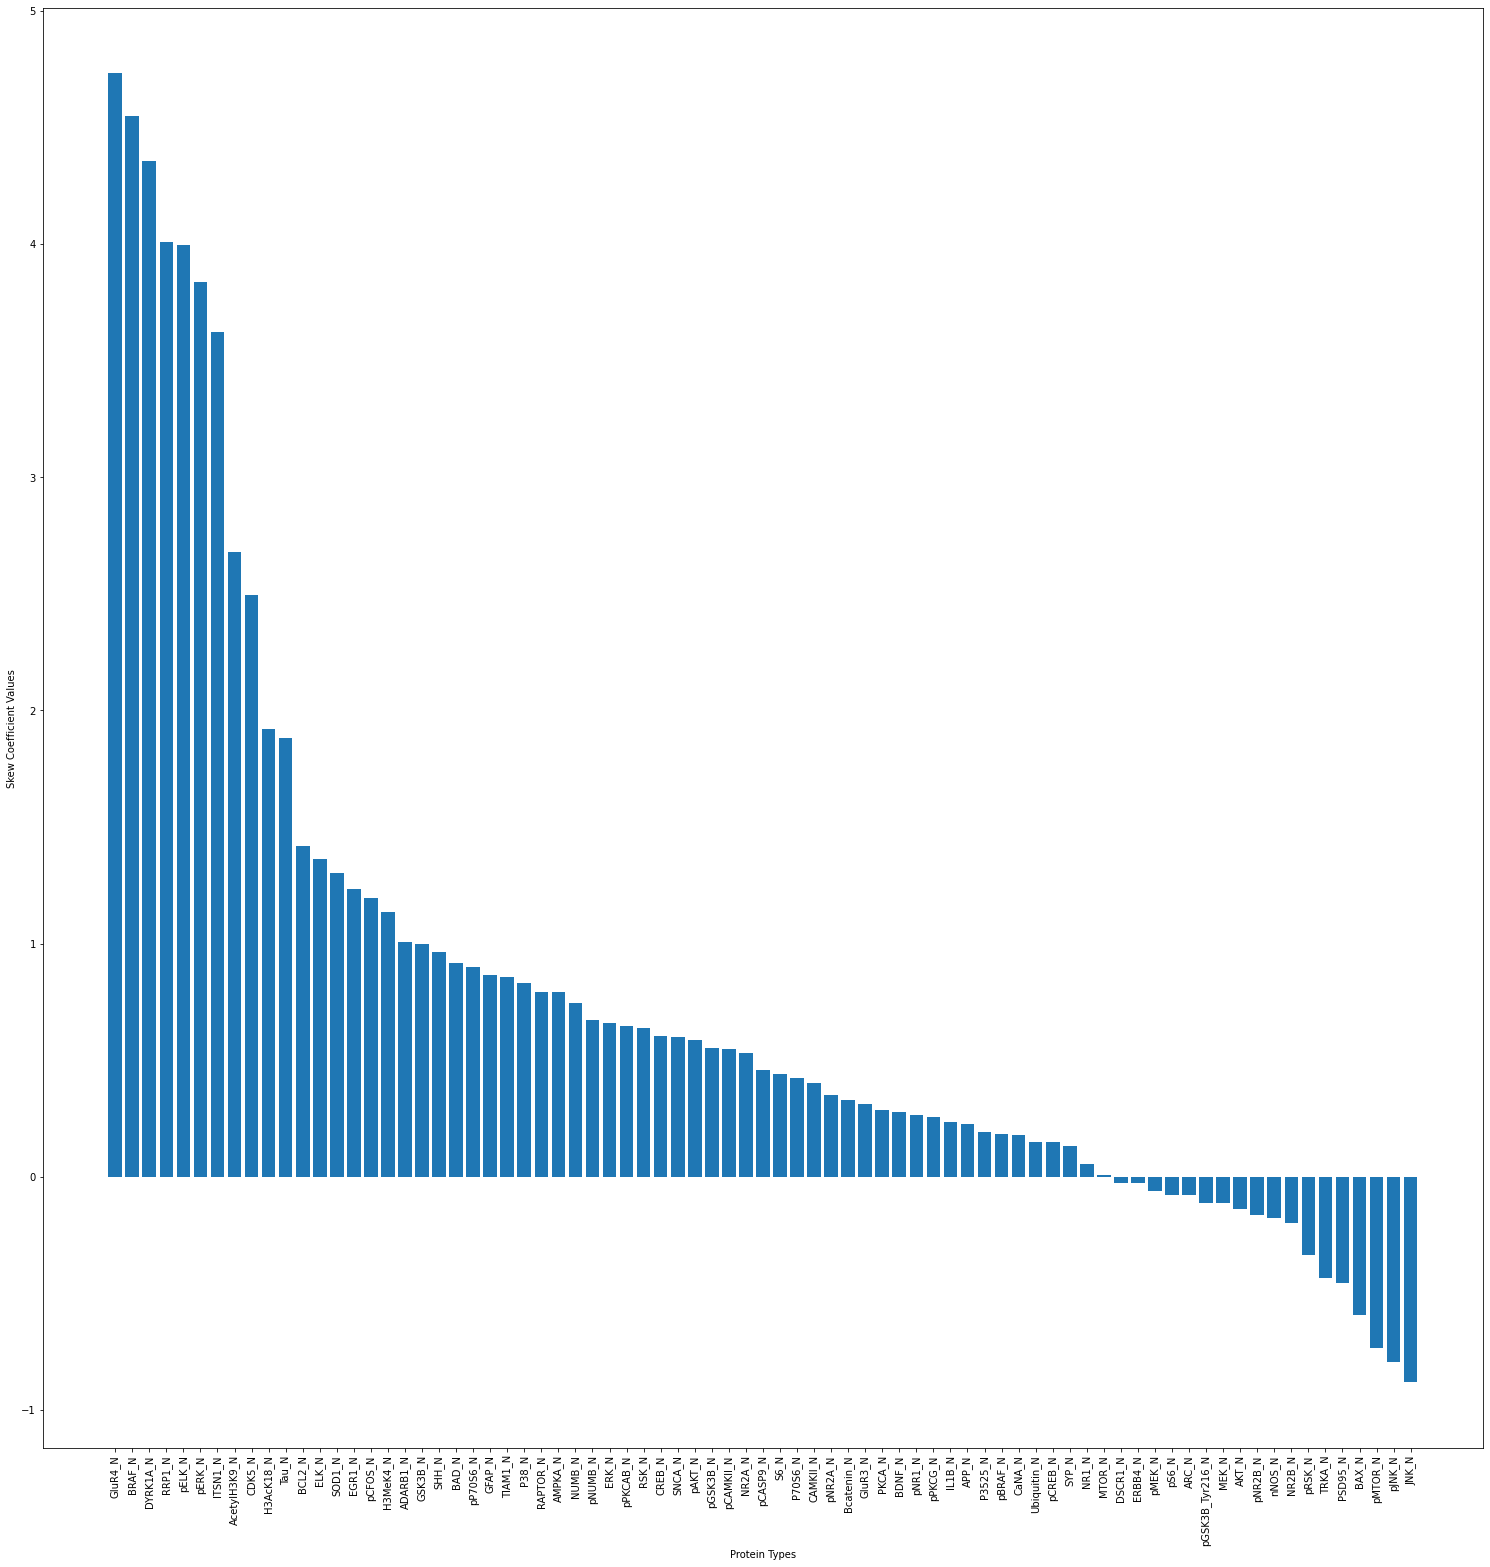

In [141]:
# sk_df.plot.bar(title = 'Skew values of all features')
fig, ax = plt.subplots(figsize = (20,20))
ax = fig.add_axes([0,0,1,1])
ax.bar(sk_df['Features'],sk_df['Skew'])
plt.xticks(rotation = 90)
plt.xlabel('Protein Types')
plt.ylabel('Skew Coefficient Values')
plt.show()

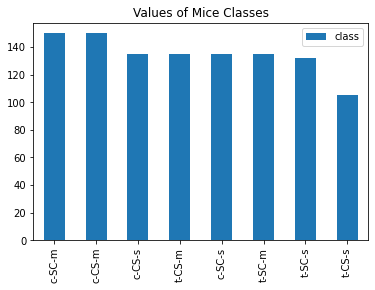

In [115]:
p = dataa['class'].value_counts().to_frame()
p.plot.bar(title = 'Values of Mice Classes')

Following dataset is evenly distributed in target classes

In [118]:
d_col = dataa.columns[:-1]

In [119]:
col_arr = []
for x in d_col:
    col_arr.append(x)

In [120]:
del d_col

numericalise the 'class' to map correlations with other features

In [121]:
arr = dataa['class'].unique()

arx = {arr[0] : 1,
       arr[1] : 2,
       arr[2] : 3,
       arr[3] : 4,
       arr[4] : 5,
       arr[5] : 6,
       arr[6] : 7,
       arr[7] : 8}

dataa['class'] = dataa['class'].map(arx)
# dataa

In [122]:
import matplotlib.pyplot as plt

In [134]:
def corr_heatmap(cols):
    correlations = dataa[cols + ['class']].corr()
    
    cmap = sns.diverging_palette(220,10,as_cmap = True)
    fig, ax = plt.subplots(figsize = (11,11))
    sns.heatmap(correlations, cmap = cmap , vmax = 1.0, center = 0,
                square = True, linewidth = 0.5,annot = True)
    sns.pairplot(dataa[cols + ['class']])

    plt.show()

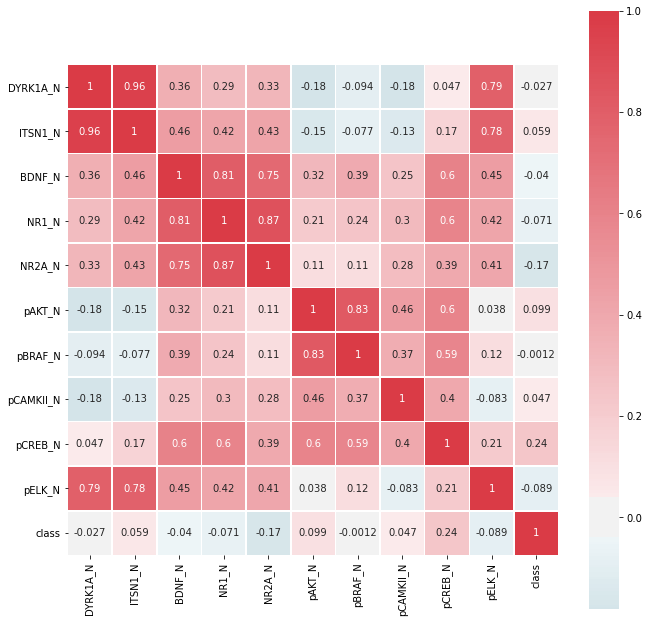

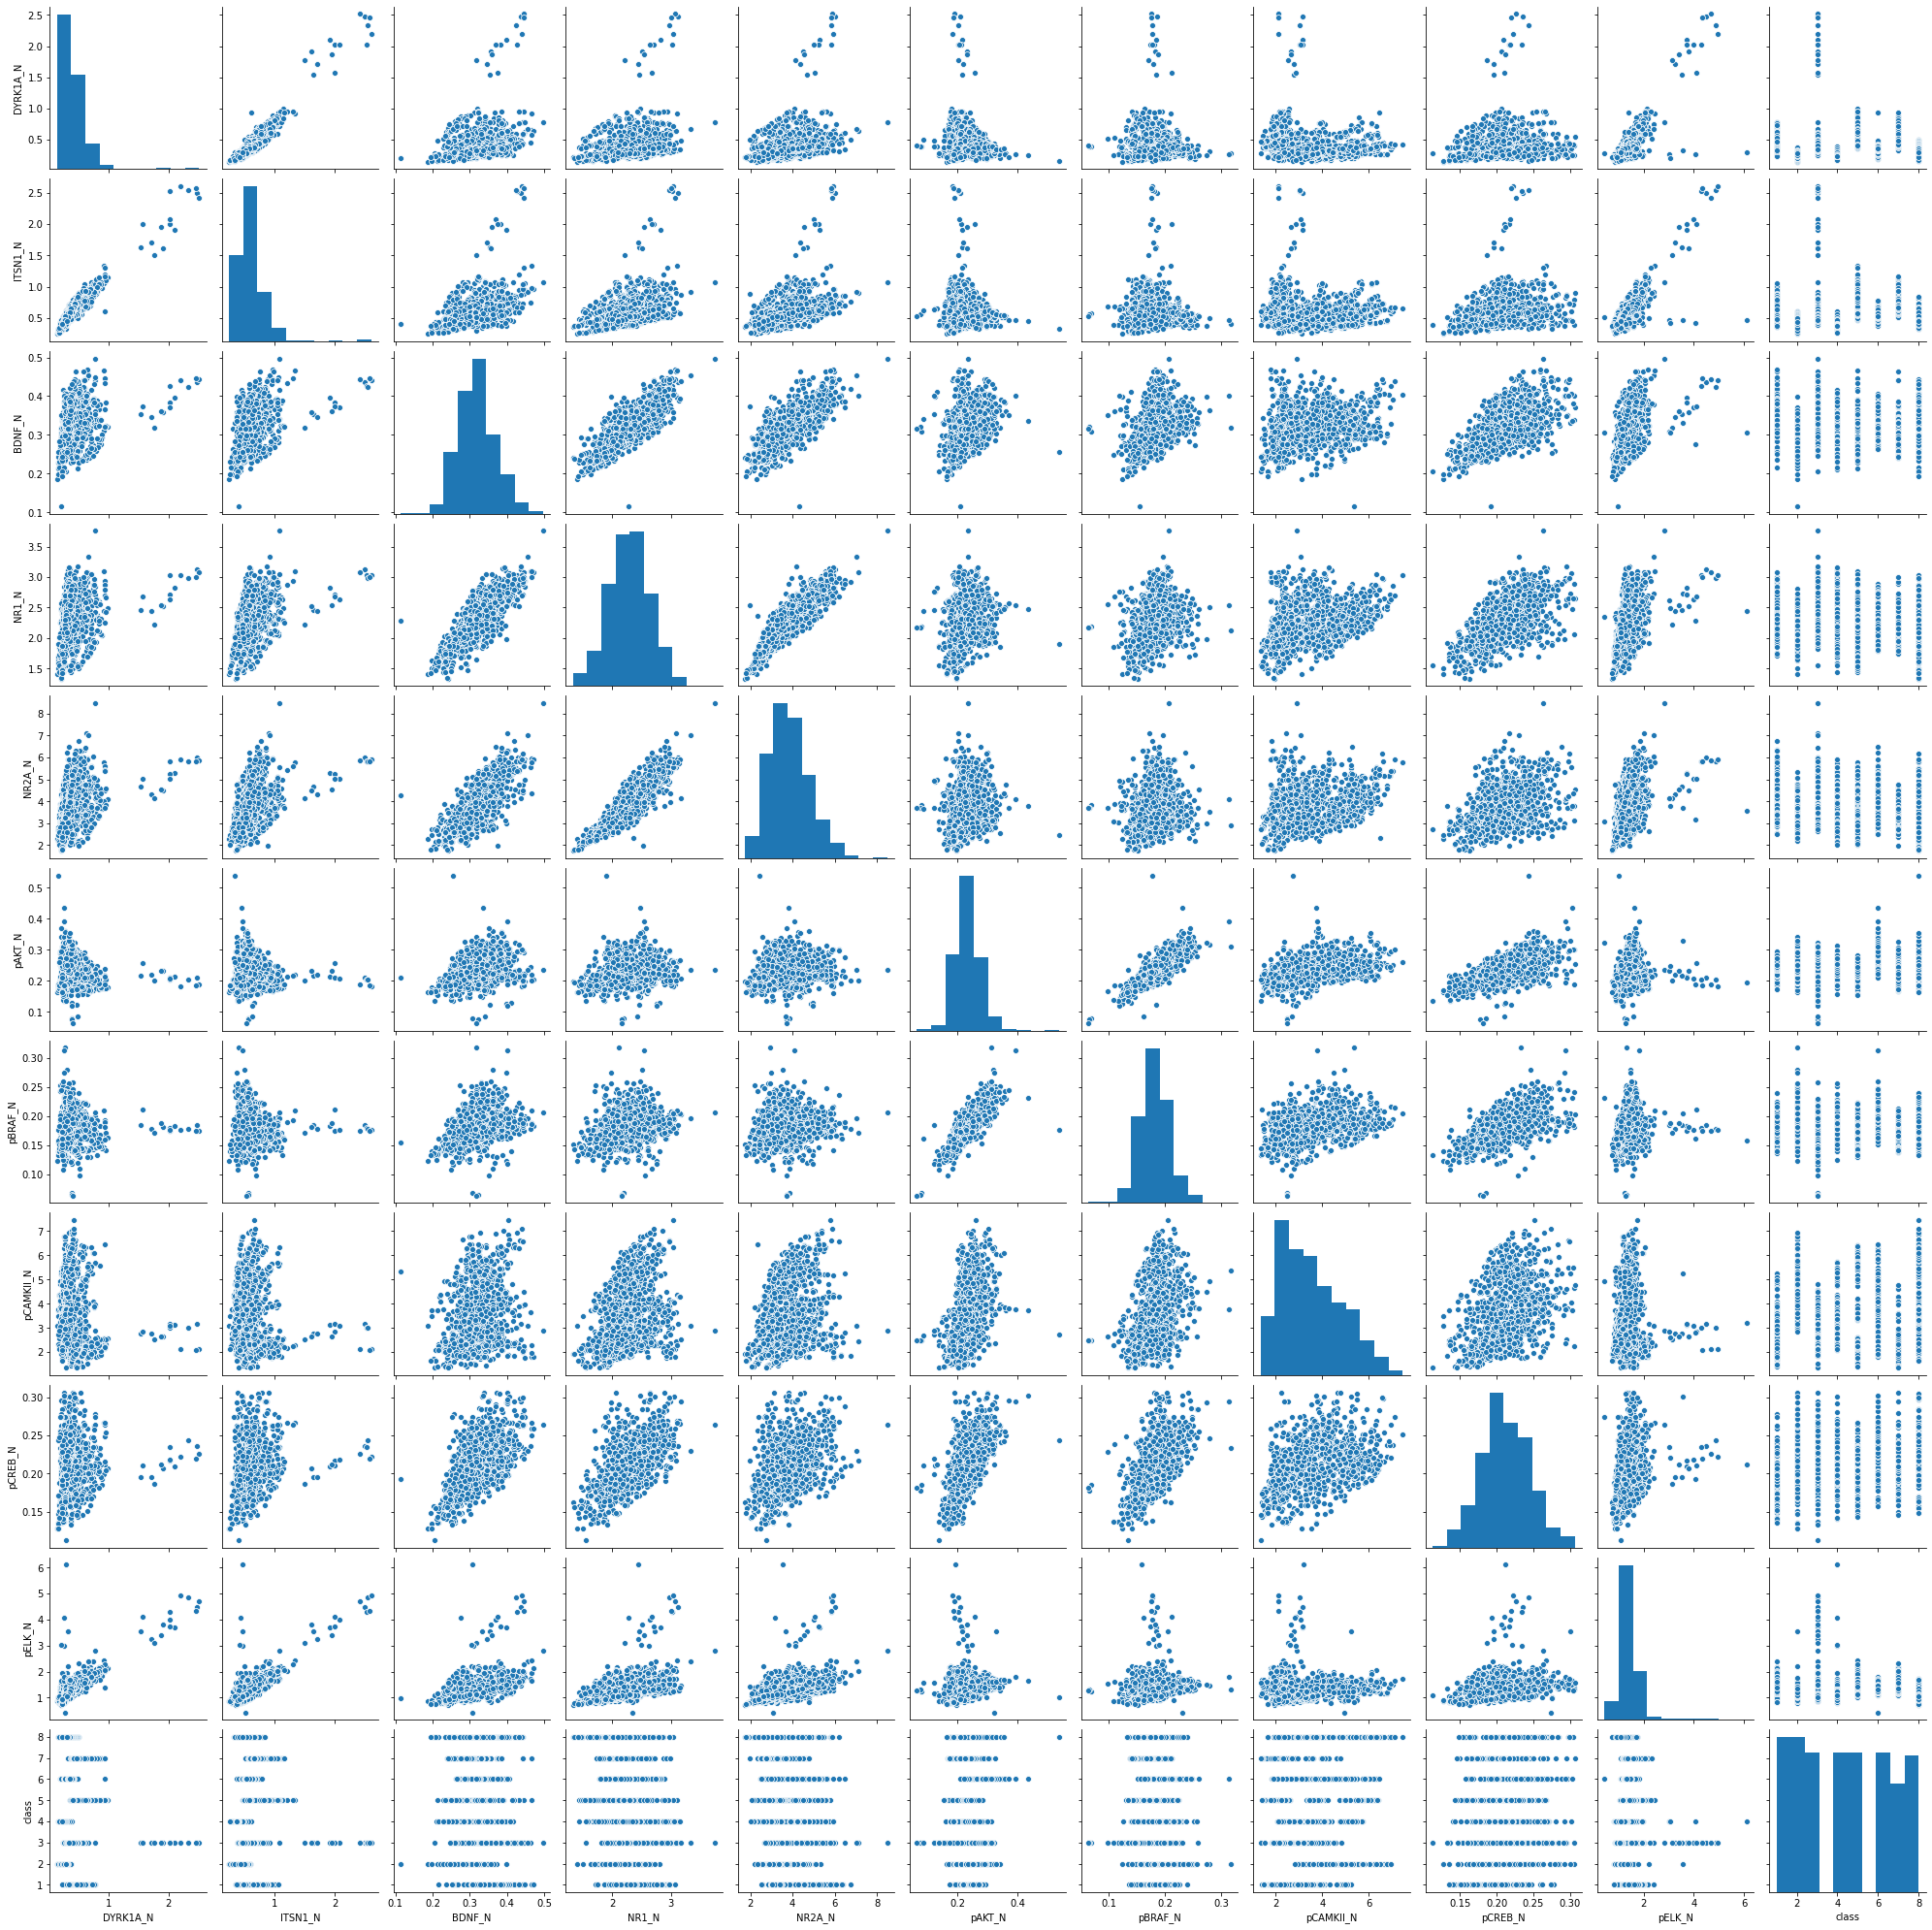

In [135]:
corr_heatmap(col_arr[:10])

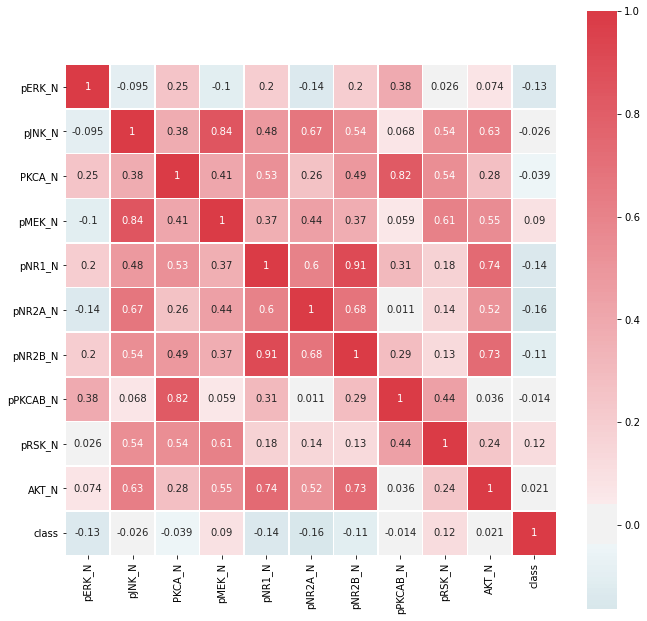

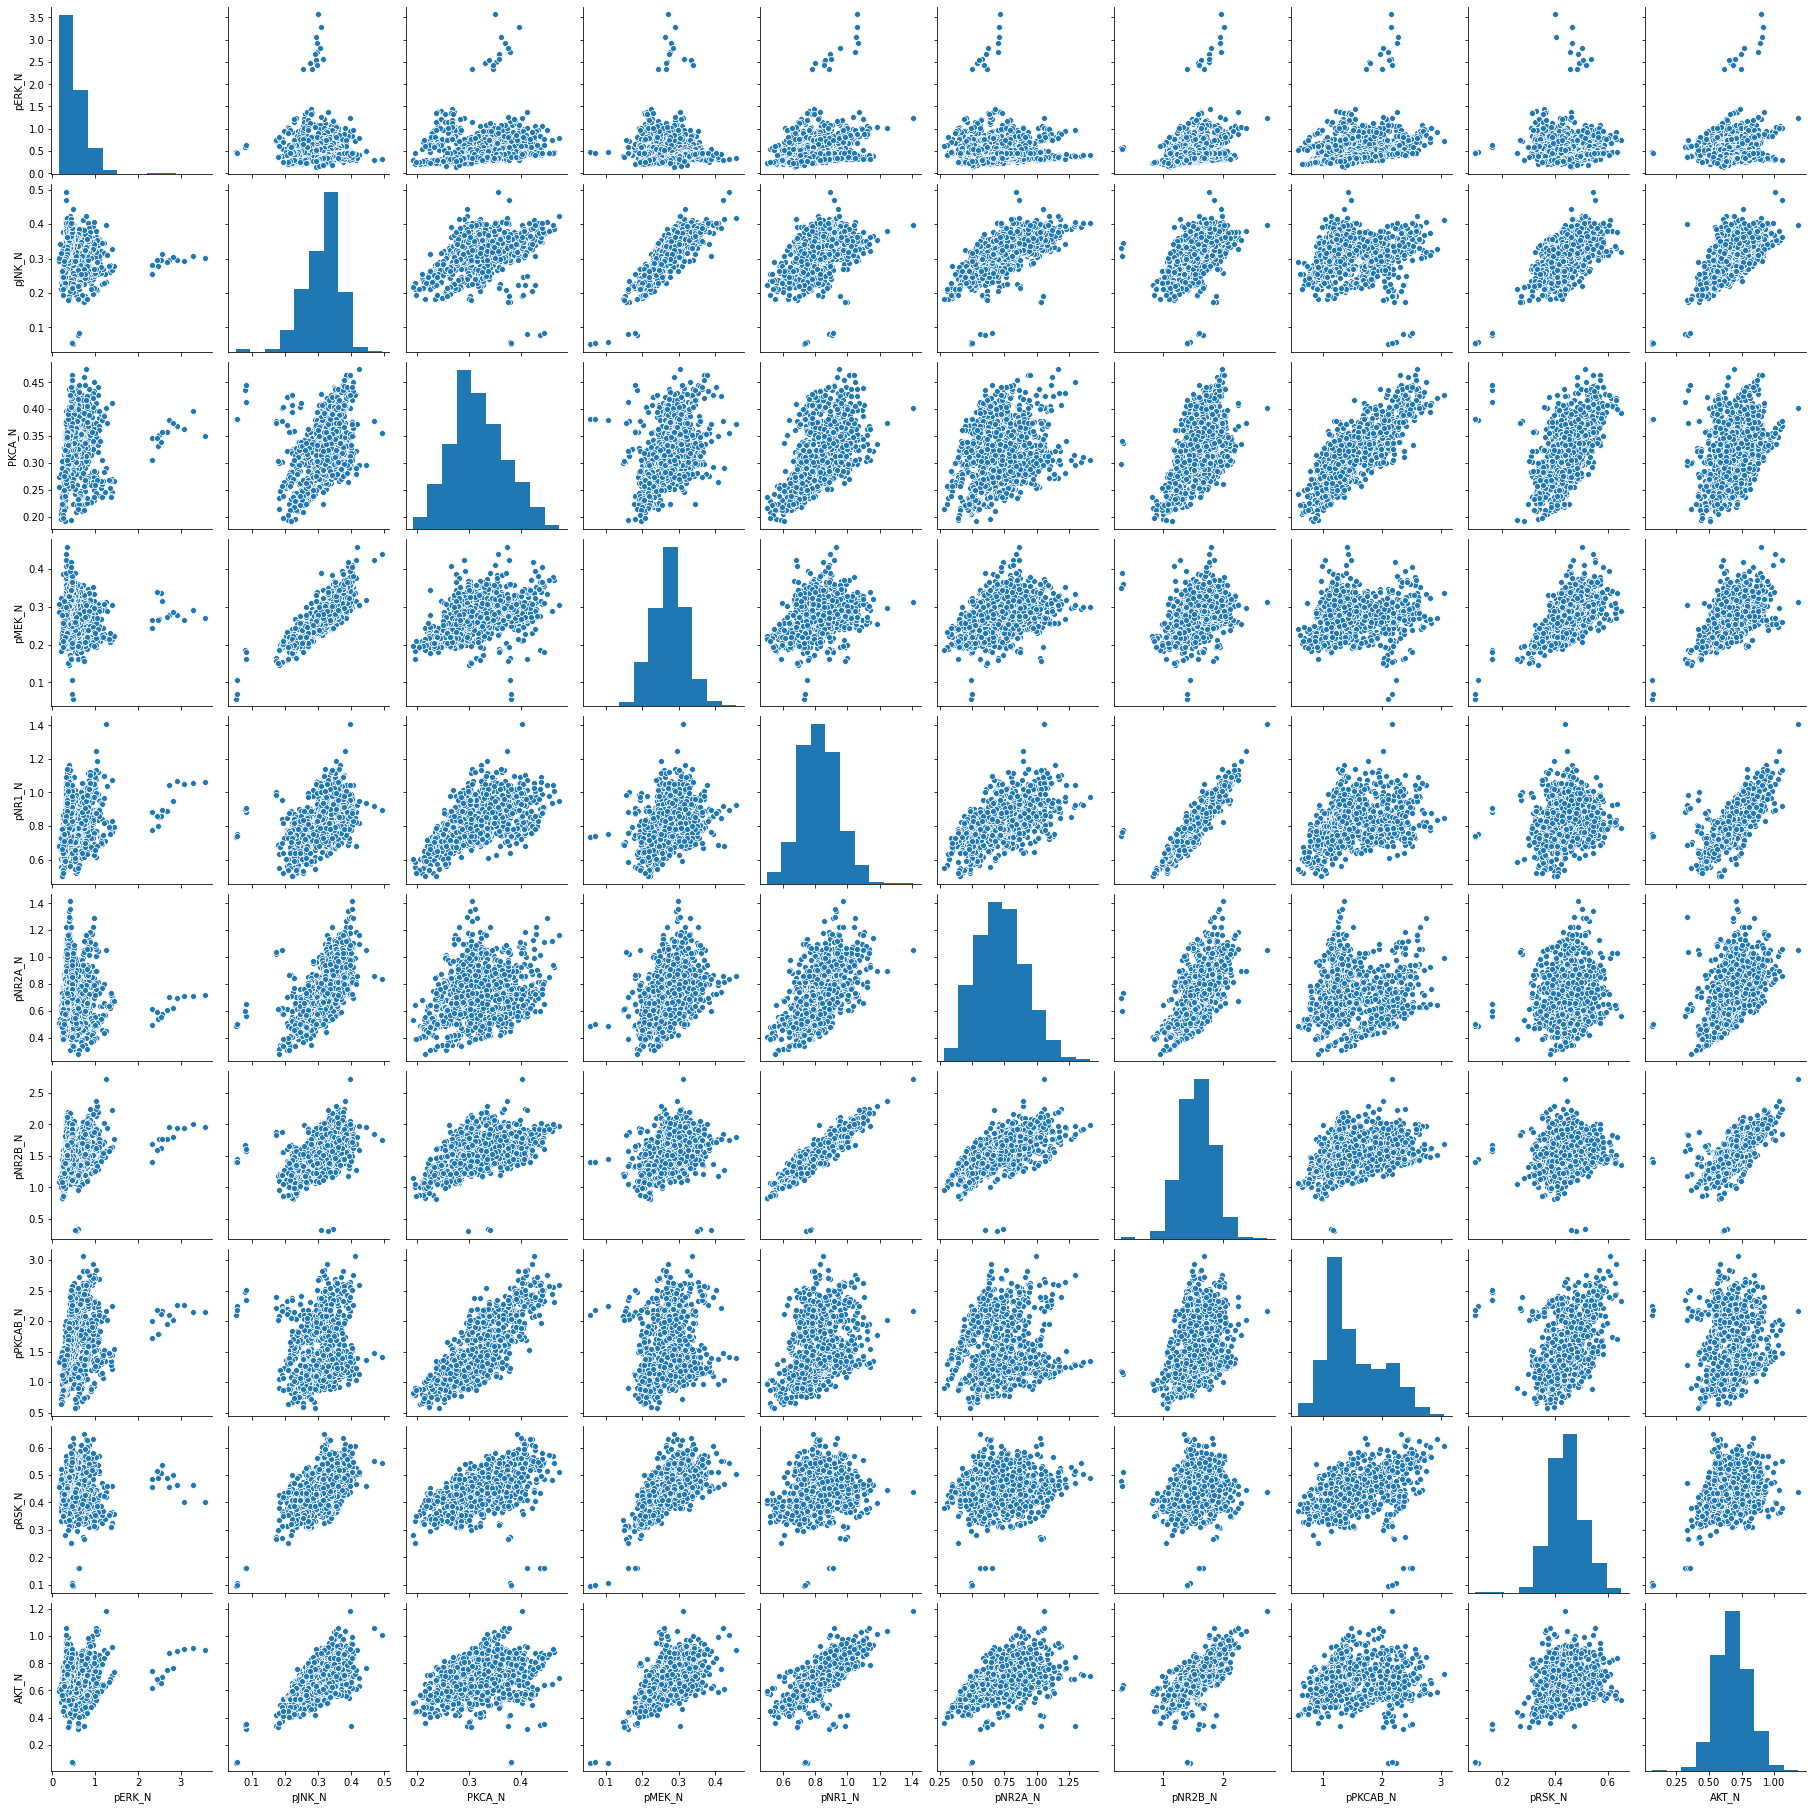

In [125]:
corr_heatmap(col_arr[10:20])

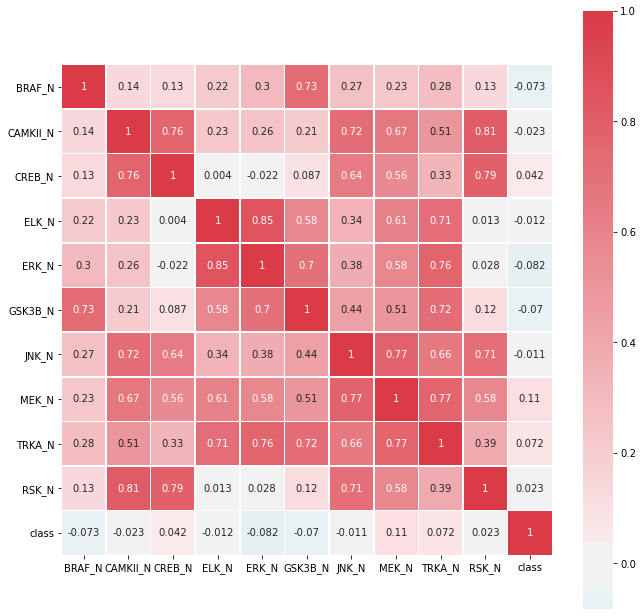

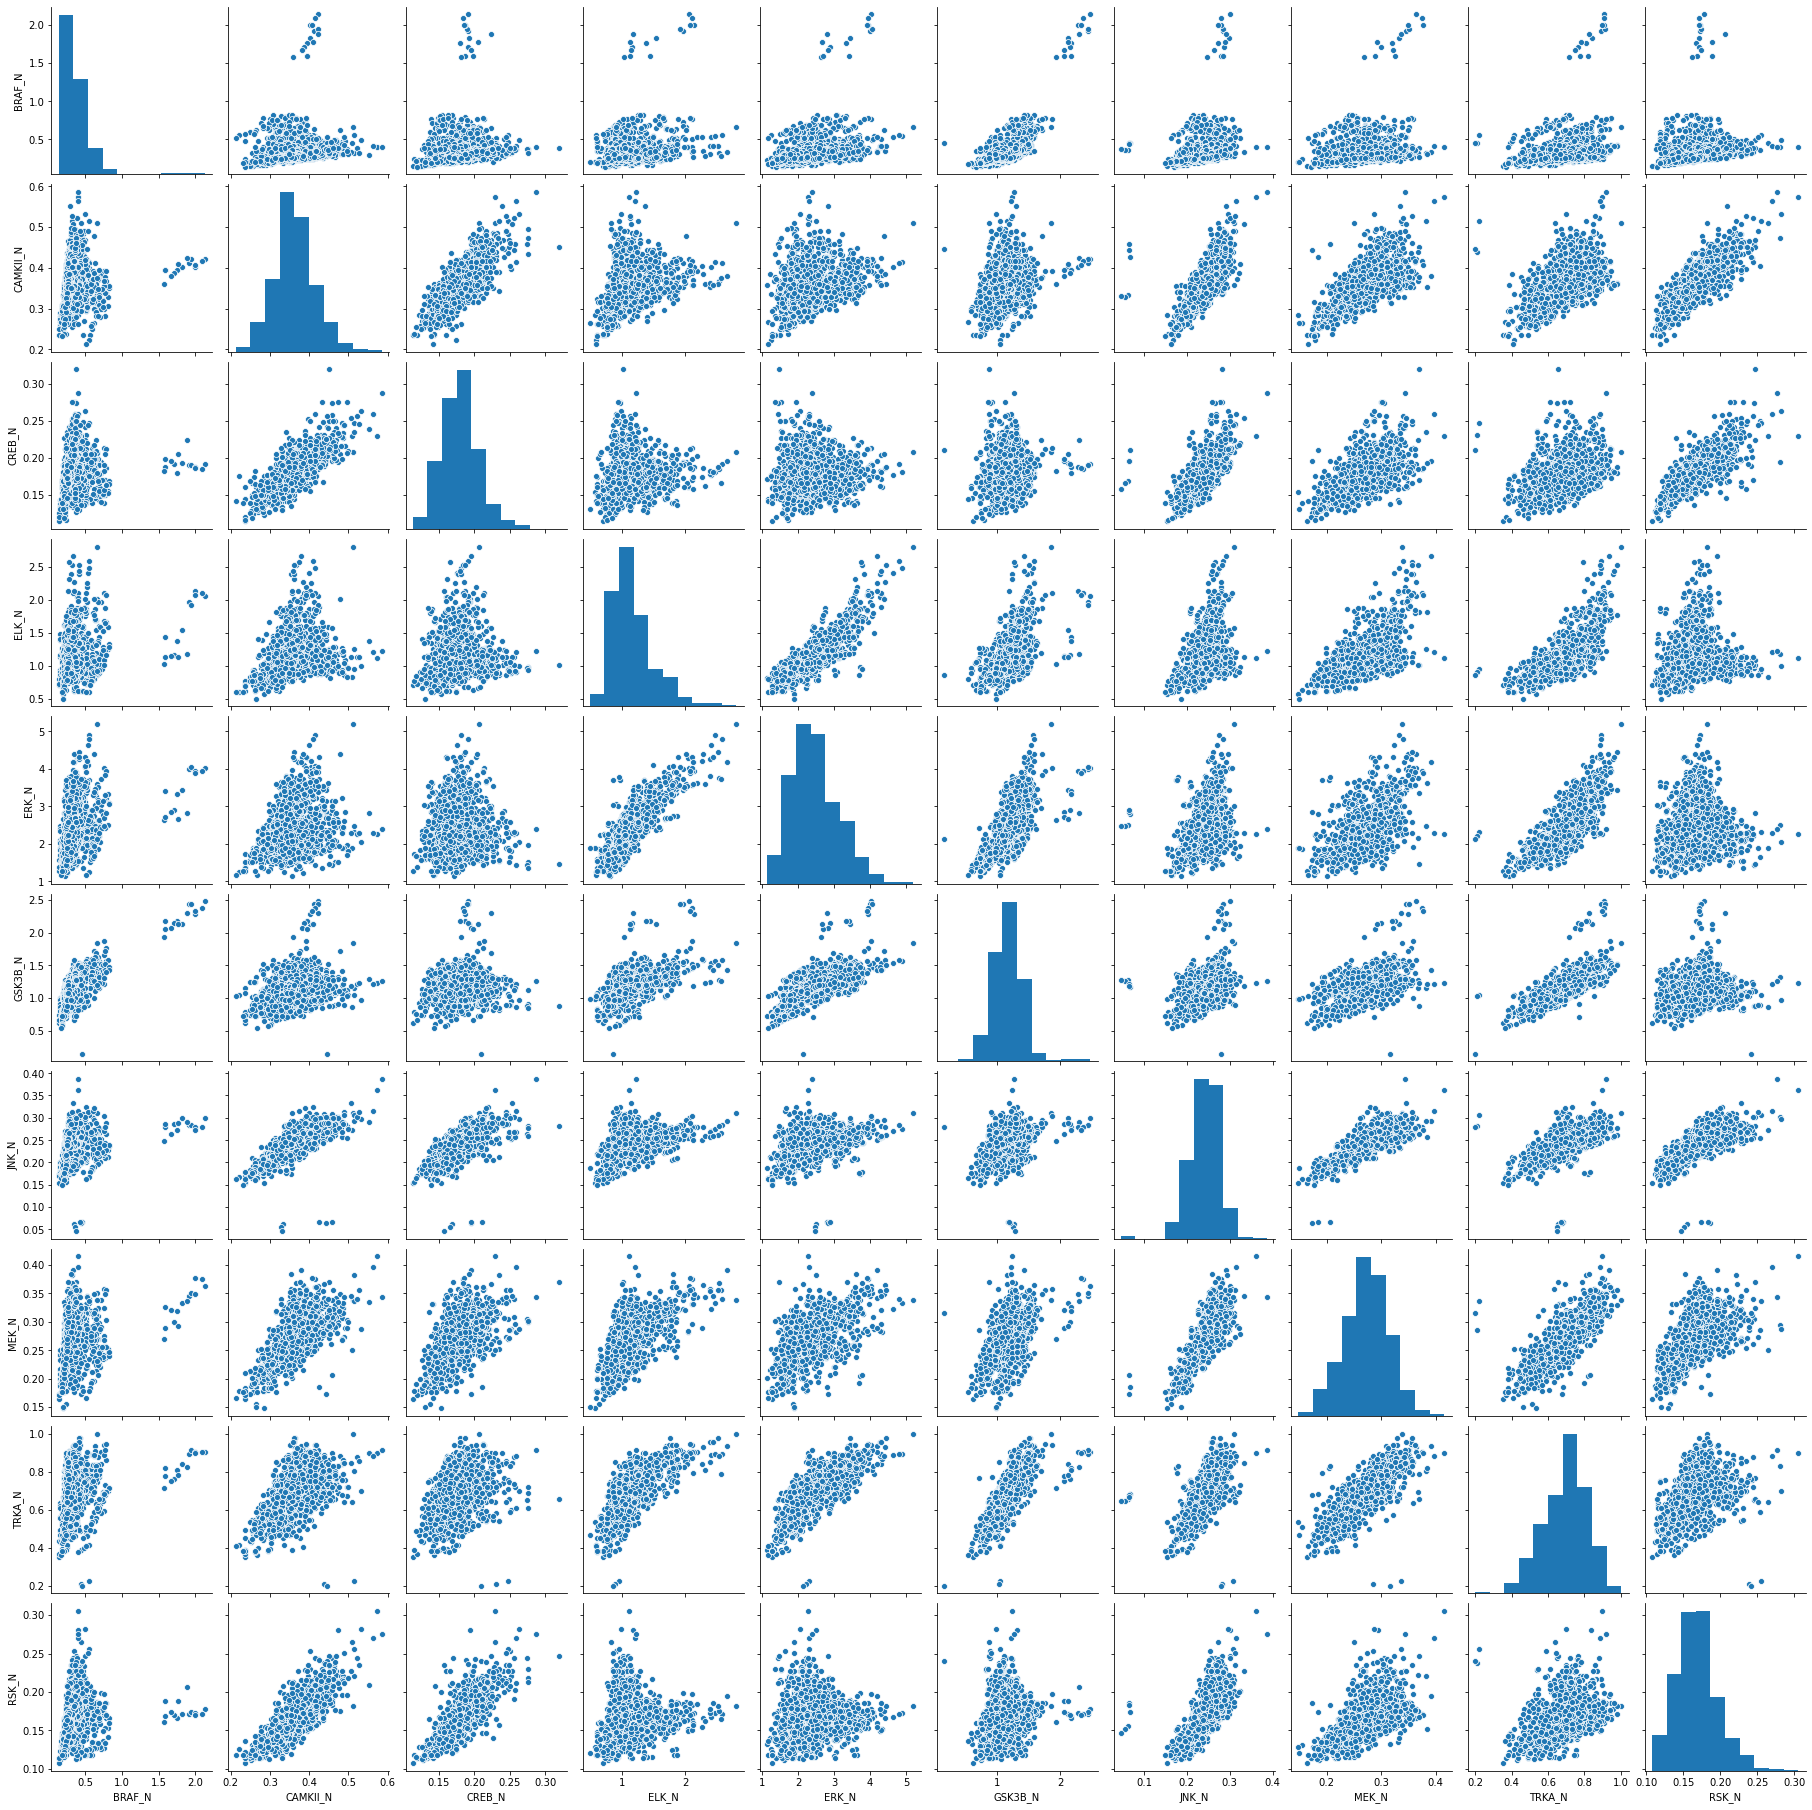

In [126]:
corr_heatmap(col_arr[20:30])

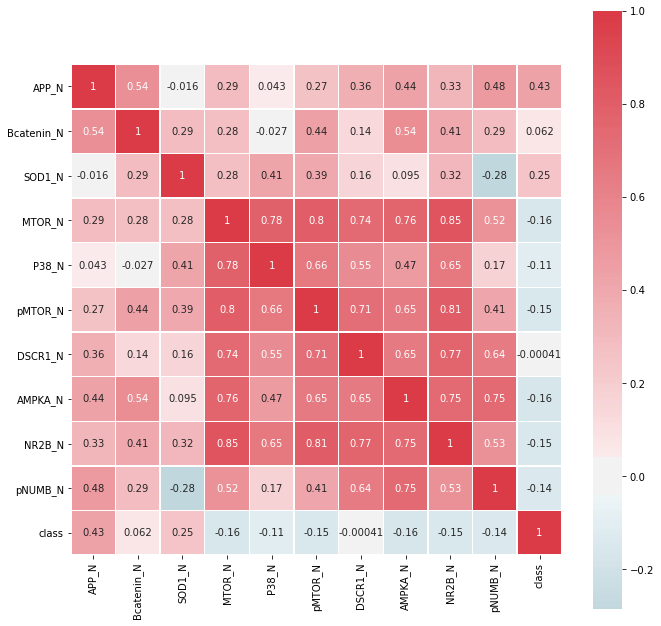

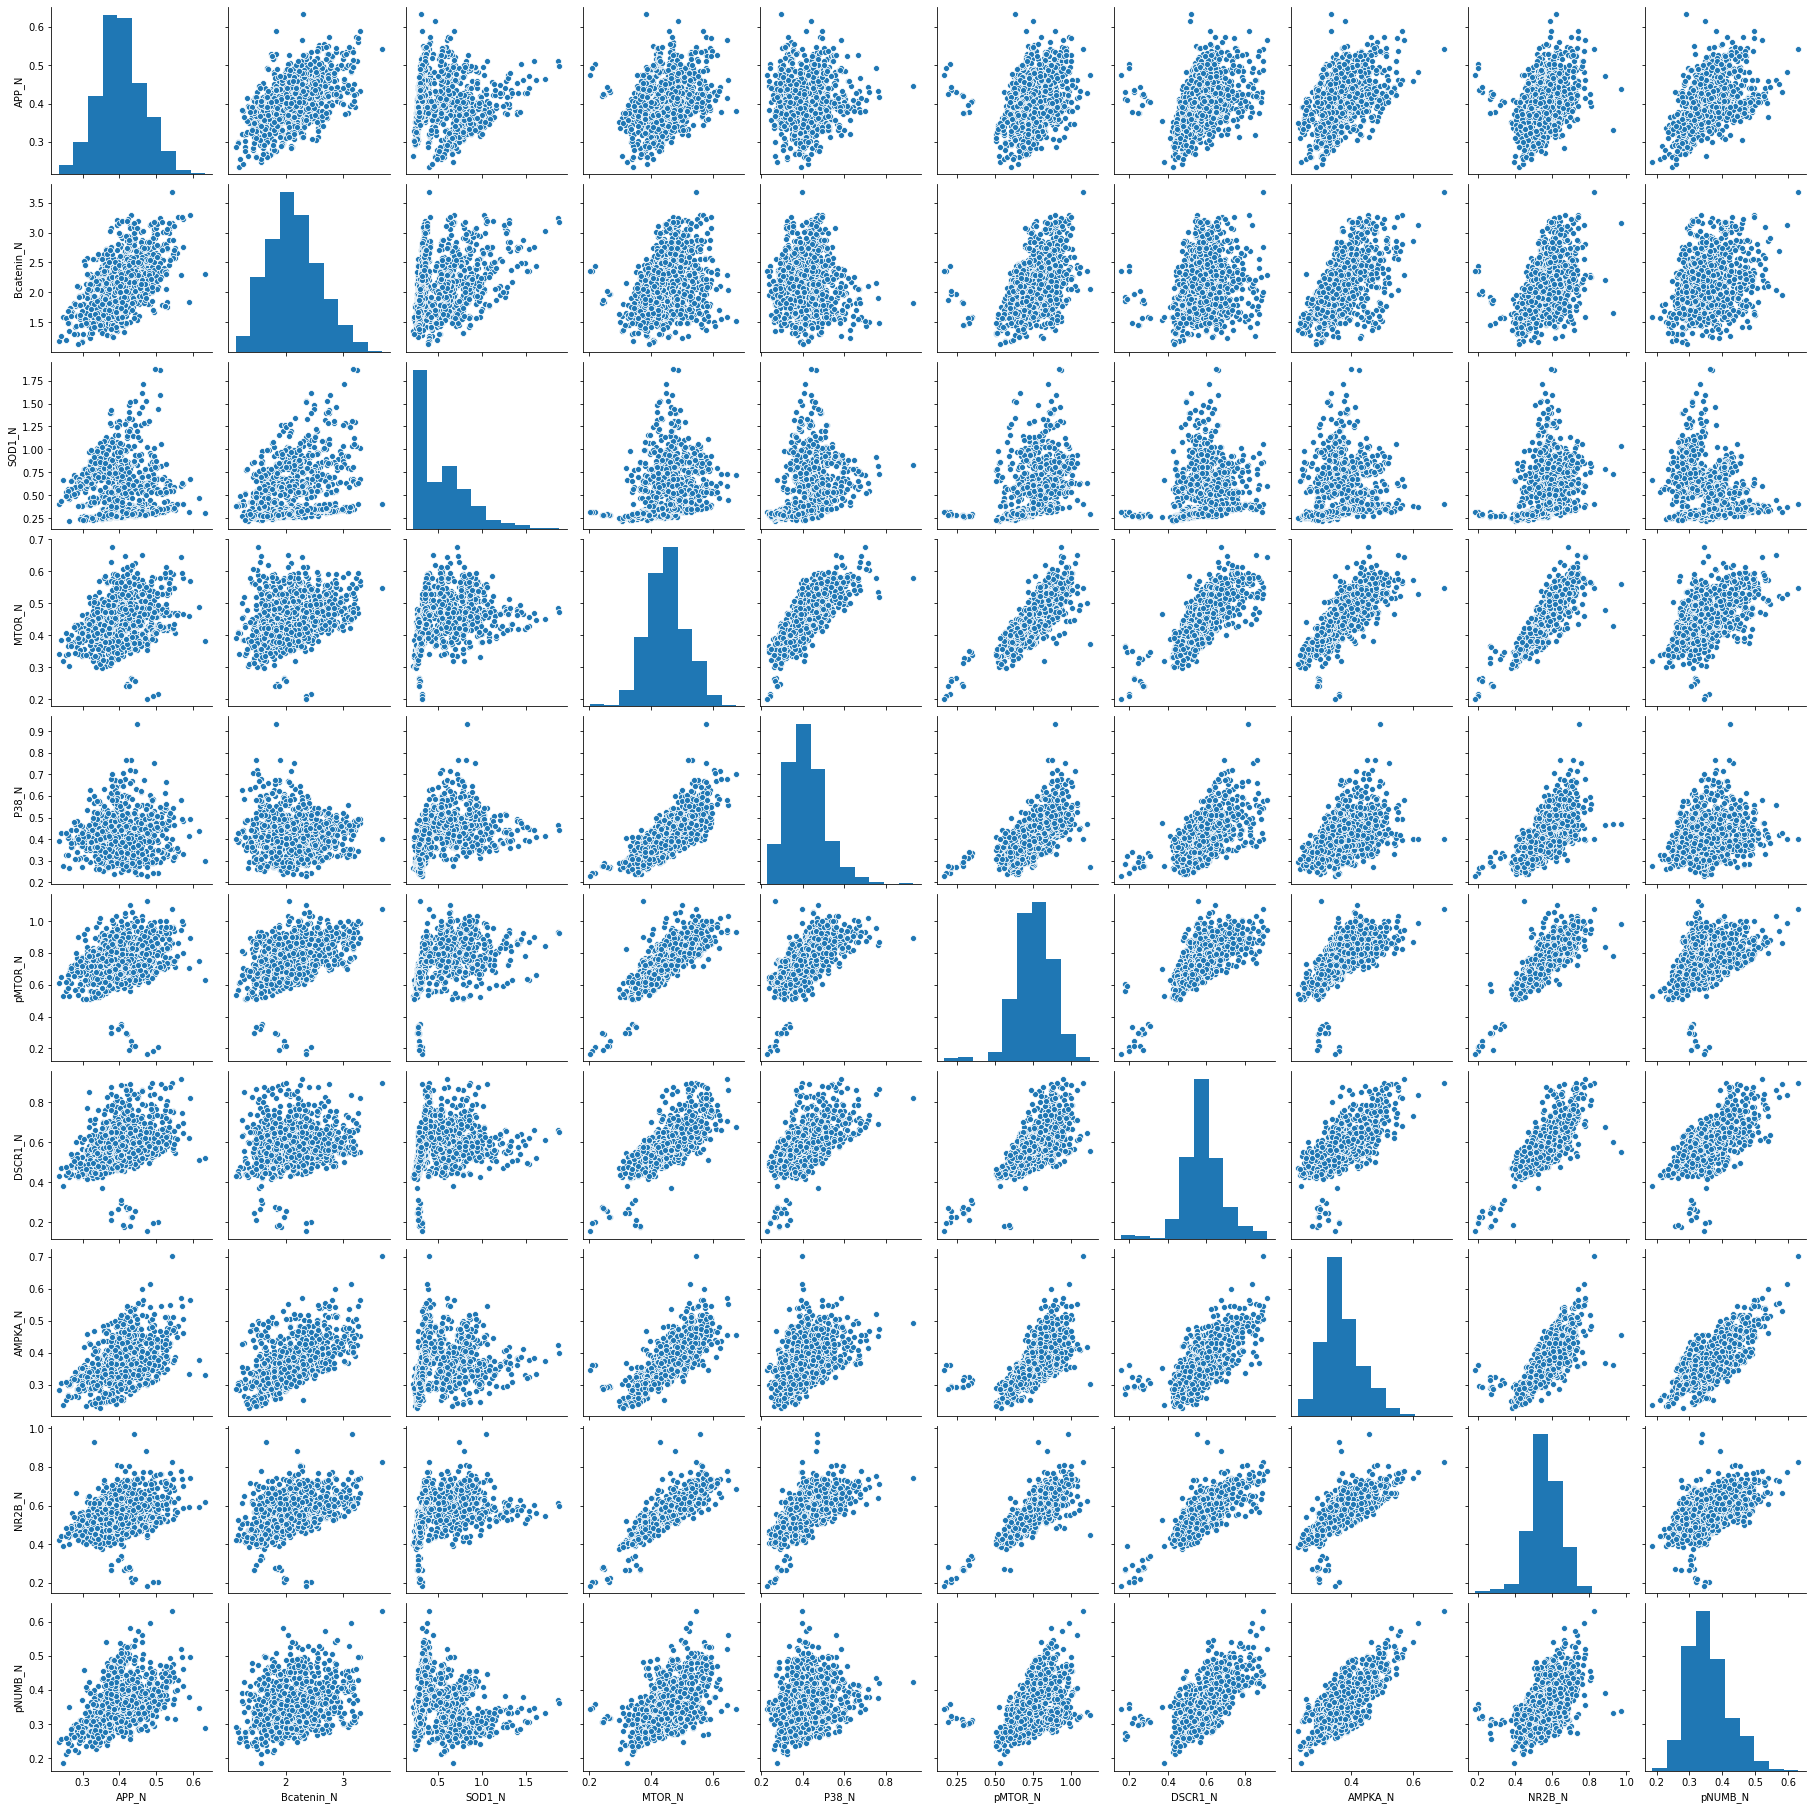

In [127]:
corr_heatmap(col_arr[30:40])

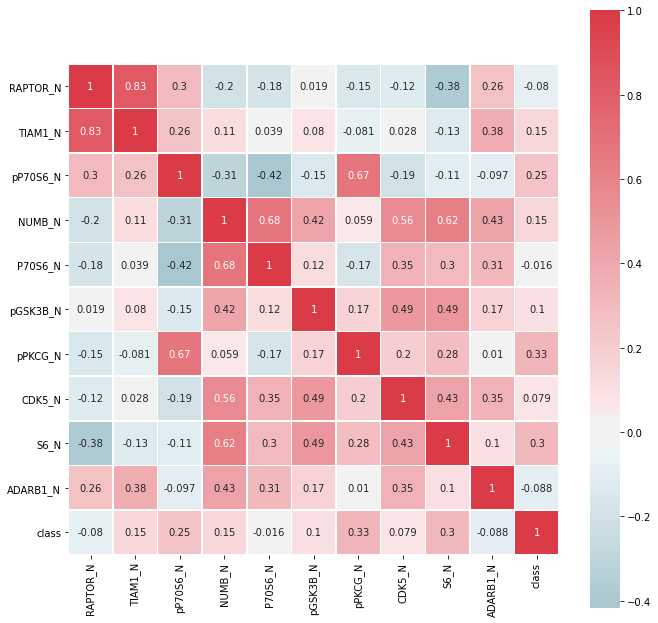

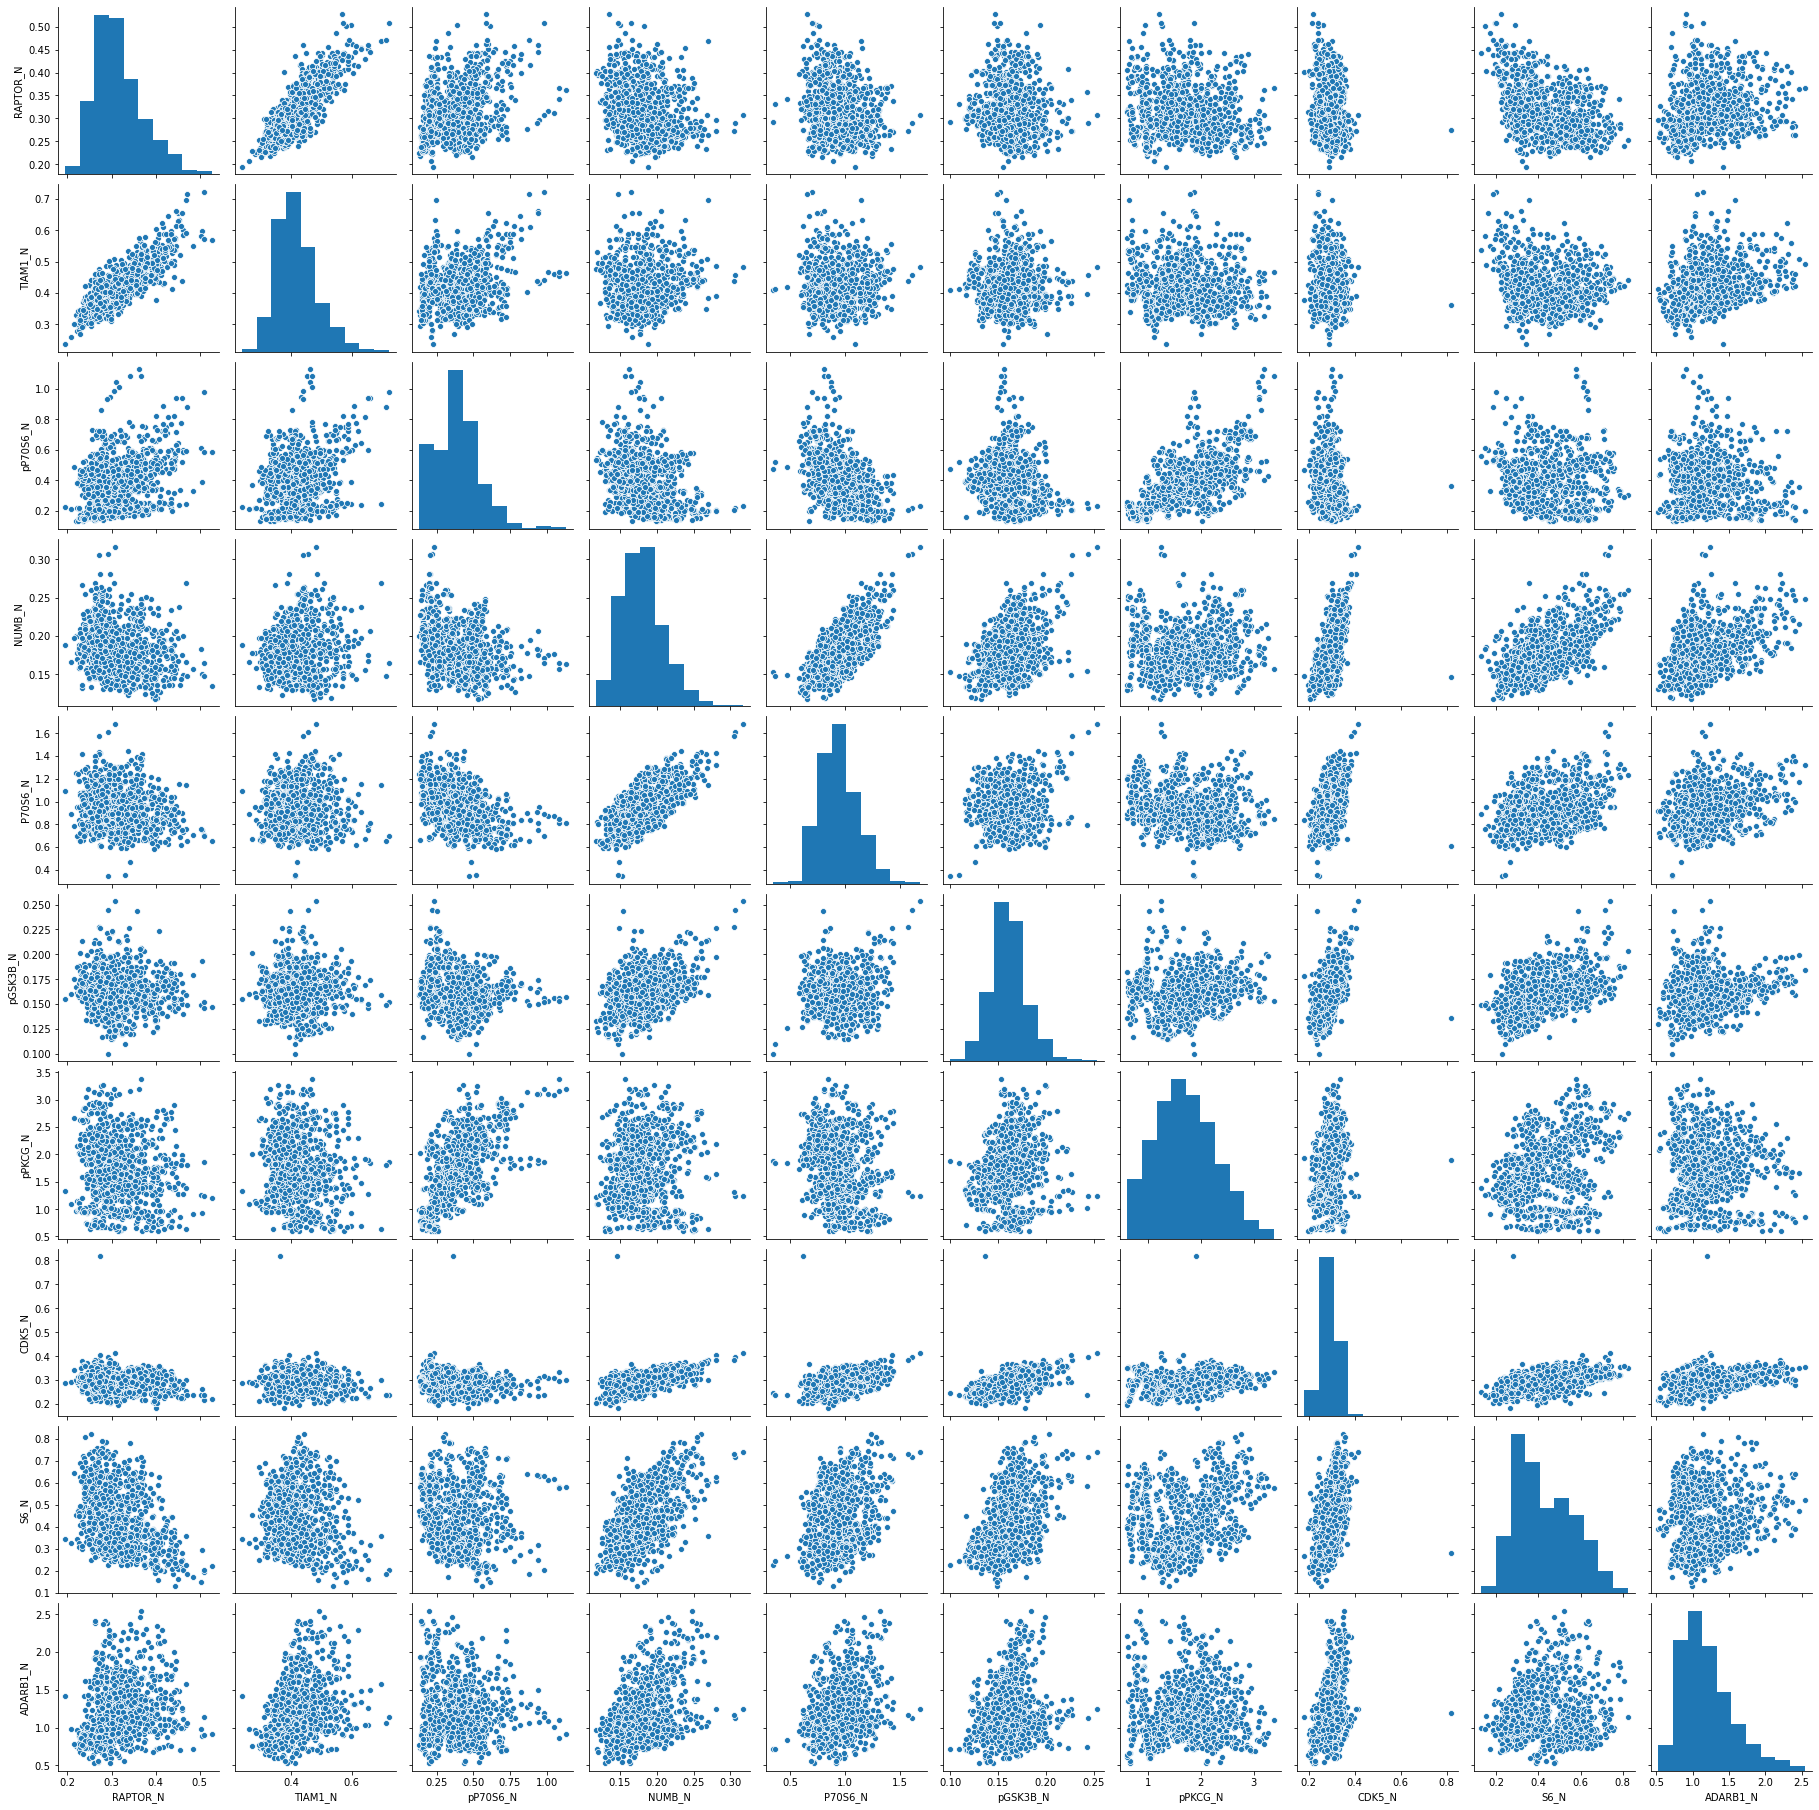

In [128]:
corr_heatmap(col_arr[40:50])

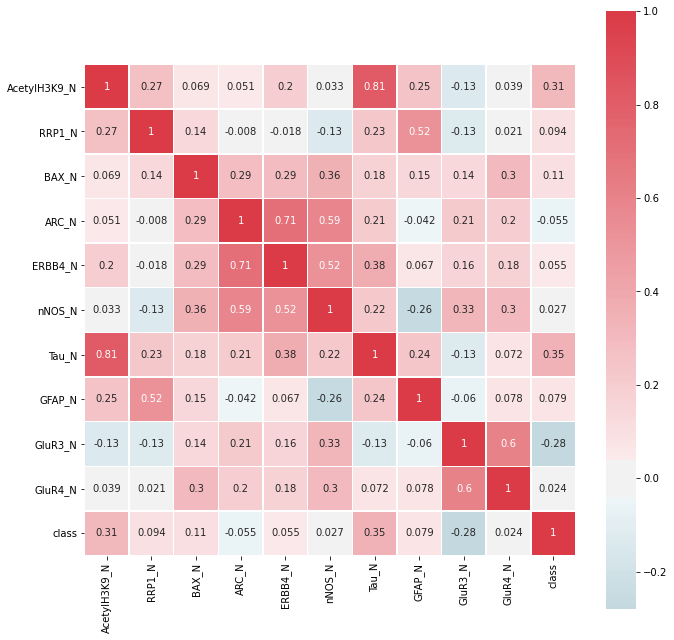

KeyboardInterrupt: 

In [129]:
corr_heatmap(col_arr[50:60])

In [ ]:
corr_heatmap(col_arr[60:70])

In [ ]:
corr_heatmap(col_arr[70:])

# Numericalize all necessary columns

In [150]:
dataa.Genotype.unique()
x = {'Control': 1,
    'Ts65Dn' : 2}
dataa.Genotype = dataa.Genotype.map(x)

In [145]:
# dataa.Treatment.unique()
x = {'Memantine': 1, 
     'Saline': 2}
dataa.Treatment = dataa.Treatment.map(x)
# dataa

In [146]:
# dataa.Behavior.unique()
x = { 'C/S' : 1,
    'S/C' : 2}
dataa.Behavior = dataa.Behavior.map(x)
# dataa

In [147]:
# arr = dataa['class'].unique()

# arx = {arr[0] : 1,
#       arr[1] : 2,
#       arr[2] : 3,
#       arr[3] : 4,
#       arr[4] : 5,
#       arr[5] : 6,
#       arr[6] : 7,
#       arr[7] : 8}

# dataa['class'] = dataa['class'].map(arx)
# dataa

In [151]:
dataa

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0      2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1      2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2      2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3      2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4      2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   
...         ...       ...       ...  ...       ...       ...        ...   
1075   2.483740  0.207317  1.057971  ...  0.183324  0.374088   0.318782   
1076   2.512737  0.216339  1.081150  ...  0.175674  0.375259   0.325639   
1077   1.989723  0.185164  0.884342  ...  0.158296  0.422121   0.321306   
1078   2.086028  0.192044  0.922595  ...  0.196296  0.397676   0.335936   
1079   2.361816  0.223632  1.064085  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0     0.131790  0.128186  1.675652         1          1         1      1  
1     0.135103  0.131119  1.743610         1          1         1      1  
2     0.133362  0.127431  1.926427         1          1         1      1  
3     0.147444  0.146901  1.700563         1          1         1      1  
4     0.140314  0.148380  1.839730         1          1         1      1  
...        ...       ...       ...       ...        ...       ...    ...  
1075  0.204660  0.328327  1.364823         2          2         2      8  
1076  0.200415  0.293435  1.364478         2          2         2      8  
1077  0.229193  0.355213  1.430825         2          2         2      8  
1078  0.251317  0.365353  1.404031         2          2         2      8  
1079  0.252995  0.365278  1.370999         2          2         2      8  

[1077 rows x 81 columns]

In [152]:
ModelData = dataa

In [153]:
del dataa

In [154]:
ModelData

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0      2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1      2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2      2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3      2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4      2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   
...         ...       ...       ...  ...       ...       ...        ...   
1075   2.483740  0.207317  1.057971  ...  0.183324  0.374088   0.318782   
1076   2.512737  0.216339  1.081150  ...  0.175674  0.375259   0.325639   
1077   1.989723  0.185164  0.884342  ...  0.158296  0.422121   0.321306   
1078   2.086028  0.192044  0.922595  ...  0.196296  0.397676   0.335936   
1079   2.361816  0.223632  1.064085  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0     0.131790  0.128186  1.675652         1          1         1      1  
1     0.135103  0.131119  1.743610         1          1         1      1  
2     0.133362  0.127431  1.926427         1          1         1      1  
3     0.147444  0.146901  1.700563         1          1         1      1  
4     0.140314  0.148380  1.839730         1          1         1      1  
...        ...       ...       ...       ...        ...       ...    ...  
1075  0.204660  0.328327  1.364823         2          2         2      8  
1076  0.200415  0.293435  1.364478         2          2         2      8  
1077  0.229193  0.355213  1.430825         2          2         2      8  
1078  0.251317  0.365353  1.404031         2          2         2      8  
1079  0.252995  0.365278  1.370999         2          2         2      8  

[1077 rows x 81 columns]

In [156]:
all(ModelData.dtypes)

DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
RSK_N              float64
APP_N              float64
Bcatenin_N         float64
SOD1_N             float64
MTOR_N             float64
P38_N              float64
pMTOR_N            float64
DSCR1_N            float64
A

In [157]:
ModelData.shape

(1077, 81)

In [158]:
acc = {}

# <b>Modelling<b>


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
features = ModelData.loc[:, 'DYRK1A_N':'Behavior']
target = ModelData['class']

In [161]:
features.shape

(1077, 80)

In [162]:
target.shape


(1077,)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(features, target ,test_size = 0.2, random_state = 1)

In [164]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(861, 80) (216, 80) (861,) (216,)


<b>RF, Logistic Reg<b>

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# m = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
lor = LogisticRegression(max_iter = 500000)

In [166]:
lor.fit(X_train, y_train)
lor.score(X_train, y_train)

1.0

In [167]:
y_pred = lor.predict(X_test)
len(y_pred)

216

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [171]:
logreg = accuracy_score(y_test, y_pred)

In [172]:
acc.update({'logistic_regression': logreg})

In [173]:
print(confusion_matrix(y_test, y_pred))

[[35  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 23]]


In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        23

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



The model is overfitting because there are a 81 features which means there are 81 coefficients in the equation, plus with regard to this there is very little training data. That is the reason this data is overfitting.

To solve this, feature selection algorithms are to be used. 
Or Regularization.

UNIVARIATE SELECTION

In [175]:
from sklearn.feature_selection import SelectKBest,chi2, f_classif

In [176]:
bestfeat = SelectKBest(score_func = chi2, k = 10)

In [177]:
f = bestfeat.fit(X_train, y_train)

In [178]:
sc = pd.DataFrame(f.scores_)
c = pd.DataFrame(X_train.columns)
bestf = pd.concat([c,sc], axis = 1)
# sc.columns = ['BestFeat_Scores']
# sc = sc.sort_values(by = 0,ascending = False)
# all(sc)
bestf.columns = ['Features','Feature_Scores']
all(bestf.sort_values(by = 'Feature_Scores', ascending = False))

Features  Feature_Scores
77         Genotype      145.565354
78        Treatment      145.143529
79         Behavior      142.506154
7         pCAMKII_N      133.008552
32           SOD1_N       85.698971
10           pERK_N       65.394975
17         pPKCAB_N       49.945717
46          pPKCG_N       43.930478
76           CaNA_N       39.257017
0          DYRK1A_N       35.512539
24            ERK_N       26.716008
20           BRAF_N       26.126461
1           ITSN1_N       24.872182
4            NR2A_N       24.601176
50     AcetylH3K9_N       19.345196
42         pP70S6_N       15.654258
48             S6_N       14.715405
49         ADARB1_N       13.186521
15          pNR2A_N       13.119092
9            pELK_N       11.900161
65      Ubiquitin_N       10.921745
25          GSK3B_N       10.916255
34            P38_N        7.825015
35          pMTOR_N        6.413950
31       Bcatenin_N        6.078928
23            ELK_N        5.510715
19            AKT_N        4.949353
3             NR1_N        4.445445
63          PSD95_N        4.357836
16          pNR2B_N        4.110859
38           NR2B_N        3.536733
56            Tau_N        3.522576
60           IL1B_N        3.474554
73        H3AcK18_N        2.970890
39          pNUMB_N        2.922344
62         pCASP9_N        2.898436
30            APP_N        2.462844
33           MTOR_N        2.452448
36          DSCR1_N        1.946080
40         RAPTOR_N        1.828376
14           pNR1_N        1.762926
44          P70S6_N        1.635978
11           pJNK_N        1.550416
41          TIAM1_N        1.521264
75         H3MeK4_N        1.490196
37          AMPKA_N        1.478160
13           pMEK_N        1.332272
5            pAKT_N        1.234714
12           PKCA_N        1.217149
74           EGR1_N        1.205763
28           TRKA_N        1.172875
64           SNCA_N        1.072412
21         CAMKII_N        0.957823
43           NUMB_N        0.729595
72            SYP_N        0.723683
45         pGSK3B_N        0.717105
2            BDNF_N        0.694161
18           pRSK_N        0.685684
47           CDK5_N        0.668870
70            pS6_N        0.667357
53            ARC_N        0.667357
6           pBRAF_N        0.584553
66  pGSK3B_Tyr216_N        0.578292
55           nNOS_N        0.542820
8           pCREB_N        0.476615
58          GluR3_N        0.451994
68            BAD_N        0.432121
27            MEK_N        0.400404
61          P3525_N        0.366182
22           CREB_N        0.326478
71          pCFOS_N        0.282012
67            SHH_N        0.258560
51           RRP1_N        0.246921
54          ERBB4_N        0.240732
69           BCL2_N        0.236277
26            JNK_N        0.223392
29            RSK_N        0.216100
57           GFAP_N        0.157628
52            BAX_N        0.149728
59          GluR4_N        0.103448

In [179]:
# all(bestfeatures.sort_values(by = 'Feature_Scores',ascending = False))

In [180]:
bestfeatures = bestf[bestf['Feature_Scores'] >= 1]
model = LogisticRegression()
model.fit(X_train[bestfeatures.Features], y_train)
y_new = model.predict(X_test[bestfeatures.Features])
print(model.score(X_train[bestfeatures.Features], y_train),
accuracy_score(y_new, y_test))

1.0 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [181]:
newimp = SelectKBest(score_func=f_classif, k=10).fit_transform(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [182]:
newimp[0]

array([0.29736098, 0.27426956, 0.61097982, 0.11307035, 1.19723687,
       0.11307035, 1.58334848, 2.        , 2.        , 1.        ])

In [183]:
all(X_train.head())

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
898   0.759661  0.912582  0.262724  1.926720  2.988926  0.200283  0.177427   
1001  0.373621  0.561337  0.361930  2.196773  3.411493  0.280586  0.221966   
259   0.353194  0.551537  0.289151  2.090648  3.318624  0.194998  0.161861   
947   0.318266  0.613151  0.345641  2.153044  3.378373  0.220555  0.181198   
236   0.258343  0.425384  0.258155  1.888639  2.989876  0.202662  0.176040   

      pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
898    2.011074  0.211122  1.959708  1.035815  0.289821  0.267672  0.268850   
1001   5.370986  0.232175  1.259345  0.434217  0.334431  0.384324  0.294912   
259    4.057512  0.183368  1.193086  0.358929  0.275131  0.268440  0.234348   
947    3.476863  0.261568  1.008865  0.297029  0.287871  0.290209  0.276279   
236    4.794338  0.171354  1.134233  0.343457  0.310086  0.258343  0.267154   

        pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
898   0.680961  0.510603  1.335297  1.355561  0.386428  0.588596  0.692507   
1001  0.779845  0.772600  1.454471  1.829080  0.575992  0.712498  0.317141   
259   0.774892  0.652382  1.483033  1.023419  0.385216  0.653816  0.263980   
947   0.750414  0.643254  1.349537  1.428738  0.475207  0.808573  0.227862   
236   0.721410  0.809899  1.302775  1.058118  0.391451  0.522872  0.214661   

      CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
898   0.393261  0.177898  0.928369  2.290528  1.236569  0.233035  0.244581   
1001  0.362259  0.220649  1.057632  2.430759  1.137494  0.255722  0.332126   
259   0.332324  0.166799  1.005257  2.285009  1.176199  0.209495  0.240879   
947   0.338237  0.161715  1.493327  2.528300  1.095275  0.227862  0.312908   
236   0.315711  0.177915  0.897450  1.665729  0.873453  0.202850  0.226472   

        TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
898   0.659519  0.185674  0.380773    1.684496  0.297361  0.362865  0.274270   
1001  0.682694  0.171579  0.435534    2.305286  0.609913  0.440474  0.393381   
259   0.573841  0.133822  0.413414    1.943604  0.619086  0.490999  0.519516   
947   0.694886  0.157720  0.461179    2.435460  1.610521  0.448125  0.407793   
236   0.553243  0.143795  0.368391    1.652231  0.504874  0.413761  0.454068   

       pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
898   0.643261  0.564090  0.284637  0.432846  0.317389  0.240575  0.331527   
1001  0.751029  0.593940  0.335254  0.532686  0.383007  0.334925  0.466162   
259   0.802453  0.588816  0.377728  0.537199  0.317508  0.298232  0.427593   
947   0.664004  0.519240  0.334925  0.561715  0.319630  0.274135  0.424160   
236   0.717473  0.578365  0.331834  0.548556  0.318898  0.319273  0.418823   

      pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
898   0.154100  0.185421  0.989638  0.176877  0.947101  0.275950  0.610980   
1001  0.469949  0.166419  0.890861  0.183528  2.458980  0.306695  0.316047   
259   0.391907  0.145038  1.024232  0.115036  1.350968  0.233978  0.260075   
947   0.511057  0.208792  0.954211  0.157688  2.192570  0.312552  0.737224   
236   0.336708  0.153135  0.909854  0.151856  1.702403  0.299588  0.352908   

      ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
898   0.846392      0.082349  0.170696  0.164334  0.113070  0.139247   
1001  1.131987      0.217428  0.188842  0.187673  0.118278  0.156642   
259   0.782443      0.095242  0.128351  0.178235  0.118942  0.143884   
947   1.003654      0.372072  0.155695  0.183268  0.119484  0.158131   
236   1.293616      0.143182  0.193801  0.171762  0.128395  0.146452   

        nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
898   0.157789  0.233230  0.128704  0.196692  0.111980  0.450282  0.270496   
1001  0.166312  0.229756  0.122635  0.184272  0.114665  0.481828  0.285972   
259   0.171933  0.165365  0.096307  0.

<b>XGB<b>

In [184]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [185]:
# def compute_roc_plot(y_true, y_pred, plot=False):
#     fpr, tpr, _ = roc_curve(y_true, y_pred)
#     auc_score = auc(fpr, tpr)
#     if plot:
#         plt.figure(figsize=(7, 6))
#         plt.plot(fpr, tpr, color='blue',
#                  label='ROC (AUC = %0.4f)' % auc_score)
#         plt.legend(loc='lower right')
#         plt.title("ROC Curve")
#         plt.xlabel("FPR")
#         plt.ylabel("TPR")
#         plt.show()

In [186]:
from xgboost import XGBClassifier

In [187]:
m = XGBClassifier(maxdepth = 2,
                 gamma = 2,
                 eta = 0.8,
                 reg_alpha = 0.5,
                 reg_lambda = 0.5)
m.fit(X_train, y_train)
len(m.predict_proba(X_test))

216

In [188]:
y_pred = m.predict(X_test)
xgbacc = accuracy_score(y_test, y_pred)

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        23

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [190]:
acc.update({'XGBoost w/o Finetuning': xgbacc})

<b>FineTuning XGBoost<b>

In [191]:
m = XGBClassifier(n_jobs = -1,
                 objective = 'multi:logistic',
                 booster = 'gbtree',
                 eval_metric = 'auc',
                 silent = 1,
#                  multiclass = ('ovo', 'ovr'),
                 maxdepth = 4,
                 scale_pos_weight = 1,
                 subsample = 0.8,
                 n_estimators = 100,
                 gamma = 10,
                 eta = 0.8,
                 reg_alpha = 0.5,
                 reg_lambda = 0.5)
m.fit(X_train, y_train)
len(m.predict_proba(X_test))

216

In [192]:
y_pred = m.predict(X_test)
xgbacc_ft = accuracy_score(y_test, y_pred)

In [195]:
acc.update({'XGBoost with FineTuning': xgbacc_ft})

In [196]:
y_test.shape

(216,)

In [197]:
y_pred.shape

(216,)

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        31
           7       0.95      1.00      0.98        20
           8       1.00      0.96      0.98        23

    accuracy                           1.00       216
   macro avg       0.99      0.99      0.99       216
weighted avg       1.00      1.00      1.00       216



In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[35,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 22]])

In [200]:
arx

{'c-CS-m': 1,
 'c-SC-m': 2,
 'c-CS-s': 3,
 'c-SC-s': 4,
 't-CS-m': 5,
 't-SC-m': 6,
 't-CS-s': 7,
 't-SC-s': 8}

In [201]:
keysarr = []
for key in arx.keys():
    keysarr.append(key)
keysarr

['c-CS-m',
 'c-SC-m',
 'c-CS-s',
 'c-SC-s',
 't-CS-m',
 't-SC-m',
 't-CS-s',
 't-SC-s']

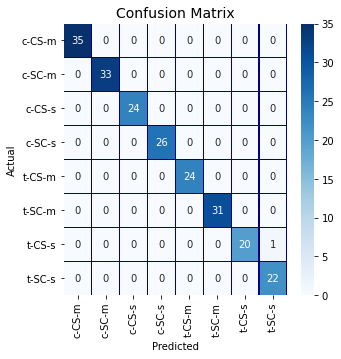

In [202]:
cm = pd.crosstab(y_pred, y_test, 
                 rownames=['Actual'], colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(cm,
            xticklabels = [keysarr[0], keysarr[1], keysarr[2],keysarr[3], 
                           keysarr[4], keysarr[5],keysarr[6],keysarr[7]],
            
            yticklabels = [keysarr[0], keysarr[1], keysarr[2],keysarr[3], 
                           keysarr[4], keysarr[5],keysarr[6],keysarr[7]],
            annot = True,
            ax = ax1,
            linewidth = .2,
            linecolor = "Darkblue",
            cmap = "Blues")
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

<b>Stochastic Gradient Descent<b>

In [203]:
from sklearn.linear_model import SGDClassifier as sgdc

In [204]:
m = sgdc(max_iter = 10, tol = None, n_jobs = -1, alpha = 0.03)
m.fit(X_train, y_train)

SGDClassifier(alpha=0.03, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [205]:
sgd_w = accuracy_score(m.predict(X_test), y_test)

In [207]:
acc.update({'SGDescent w/o FineTuning': sgd_w})

<b>Finetuning Stochastic Gradient Descent<b>

In [208]:
m = sgdc(max_iter = 5,n_jobs = -1, alpha = 0.03)
m.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.03, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [209]:
sgd_ft = accuracy_score(m.predict(X_test), y_test)

In [210]:
acc.update({'SGDescent with FineTuning': sgd_ft})

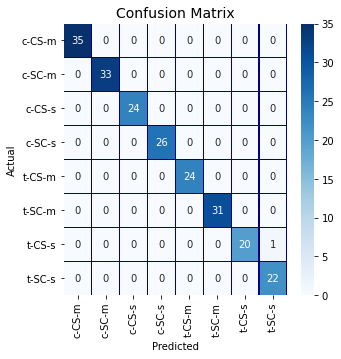

In [211]:
cm = pd.crosstab(y_pred, y_test, 
                 rownames=['Actual'], colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(cm,
            xticklabels = [keysarr[0], keysarr[1], keysarr[2],keysarr[3], 
                           keysarr[4], keysarr[5],keysarr[6],keysarr[7]],
            
            yticklabels = [keysarr[0], keysarr[1], keysarr[2],keysarr[3], 
                           keysarr[4], keysarr[5],keysarr[6],keysarr[7]],
            annot = True,
            ax = ax1,
            linewidth = .2,
            linecolor = "Darkblue",
            cmap = "Blues")
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

<b>Isolation Forest<b>

In [212]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs = -1, random_state = 1)
isf.fit(X_train, y_train)
print(isf.score_samples(X_train))

[-0.42922458 -0.39563366 -0.42300249 -0.40270104 -0.42571755 -0.39029814
 -0.47261026 -0.44824859 -0.43273337 -0.43018621 -0.40575056 -0.40741186
 -0.46182745 -0.41162452 -0.3852382  -0.40337019 -0.39705933 -0.44885646
 -0.43507271 -0.4009855  -0.4420565  -0.4361545  -0.48844837 -0.43582337
 -0.4251735  -0.44561282 -0.44299151 -0.42582646 -0.46433888 -0.38566279
 -0.40735854 -0.47292112 -0.42079084 -0.40332185 -0.44862201 -0.41263724
 -0.39442848 -0.40514889 -0.48013056 -0.42530226 -0.39452877 -0.40159895
 -0.42376897 -0.41478628 -0.4573711  -0.39809963 -0.40604327 -0.46517074
 -0.42394852 -0.5122513  -0.41998144 -0.40041668 -0.40377512 -0.40497154
 -0.40672928 -0.48478431 -0.52954138 -0.49342824 -0.46475753 -0.42349709
 -0.44063393 -0.44229305 -0.39993092 -0.43411768 -0.40987728 -0.54250657
 -0.47470857 -0.41359597 -0.43715726 -0.43318624 -0.44430103 -0.39016132
 -0.42737272 -0.41202223 -0.42512318 -0.38995023 -0.43811255 -0.49943009
 -0.46401686 -0.45444537 -0.39415883 -0.48118215 -0

Predicting outliers -  

1 : Inlier 

-1 : Outlier

In [213]:
isf.predict(X_train)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

<b>Feature Selection<b>

In [214]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators = 250, max_depth = 5, random_state = 1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
len(importances)

TOP_FEAT = 25
ind = np.argsort(importances)[::1]
ind = ind[:TOP_FEAT]

print('Top Features:')
for f in range(TOP_FEAT):
    print(f'{f+1}. feature {ind[f]} {round(importances[ind[f]],8)}')

Top Features:
1. feature 71 0.0009578
2. feature 29 0.00096933
3. feature 27 0.00105132
4. feature 44 0.00129813
5. feature 22 0.00146249
6. feature 74 0.00161732
7. feature 28 0.00175407
8. feature 59 0.00177815
9. feature 68 0.00188248
10. feature 31 0.00194728
11. feature 52 0.00197079
12. feature 16 0.00200339
13. feature 67 0.00203266
14. feature 3 0.00208321
15. feature 69 0.00210682
16. feature 5 0.00217425
17. feature 26 0.00232564
18. feature 24 0.0023757
19. feature 23 0.00240823
20. feature 13 0.00242705
21. feature 75 0.00244309
22. feature 8 0.00249858
23. feature 6 0.00256531
24. feature 57 0.00265021
25. feature 14 0.00275082


# All Accuracies

In [218]:
acc

{'logistic_regression': 1.0,
 'XGBoost w/o Finetuning': 1.0,
 'XGBoost with FineTuning': 0.9953703703703703,
 'SGDescent w/o FineTuning': 0.9907407407407407,
 'SGDescent with FineTuning': 0.9212962962962963}